In [2]:
#Project 1
mysql.connector.connect?

Object `mysql.connector.connect` not found.


In [3]:
#step1 - Data mining
#making sql connection

import mysql.connector
import pandas as pd

db = mysql.connector.connect(
host = 'localhost',
    database = 'python',
user = 'root',
password = 'sanskriti'
)

print(db)

In [4]:
query  = "select * from studmarks;"
df = pd.read_sql(query, db)
df

,name,gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [5]:
#EDA of data
import seaborn as sns
import matplotlib.pyplot as plt
df.shape

(10, 11)

In [6]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [7]:
#getting column names
df.columns

Index(['name', 'gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [8]:
#checking data type
df.dtypes

name                 object
gender               object
DOB          datetime64[ns]
Maths                 int64
Physics               int64
Chemistry             int64
English               int64
Biology               int64
Economics             int64
History               int64
Civics                int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
name         10 non-null object
gender       10 non-null object
DOB          10 non-null datetime64[ns]
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 1008.0+ bytes


In [10]:
#finding null values
df.isnull().sum()

name         0
gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [11]:
#counts of males and females
df.gender.value_counts()

F    5
M    5
Name: gender, dtype: int64

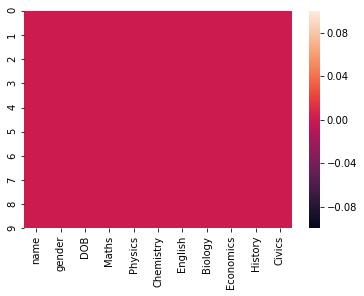

In [12]:
#Data Visualization

#checking for missing values using heat map
sns.heatmap(df.isnull())

In [13]:
#to find correlation
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


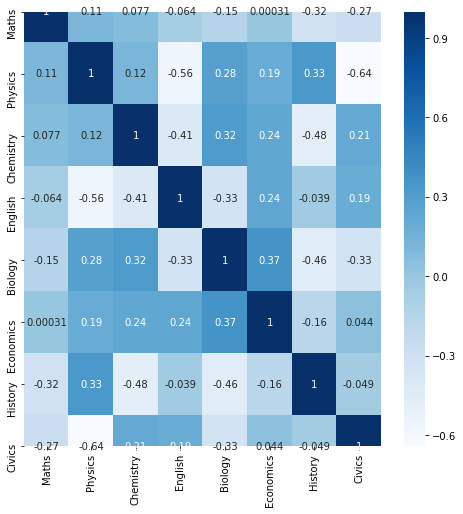

In [14]:
plt.figure(figsize= (8,8))
sns.heatmap(df.corr(),cmap = "Blues",annot = True)

In [15]:
#outliers
df.columns

Index(['name', 'gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

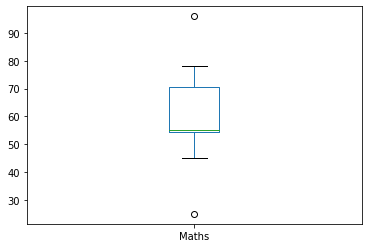

In [16]:
df["Maths"].plot.box()

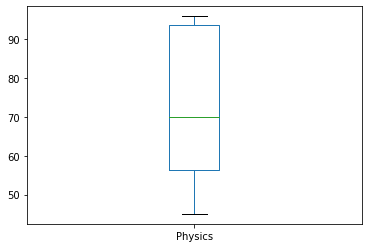

In [17]:
df["Physics"].plot.box()

In [18]:
col_list =df.columns.values
col_list

array(['name', 'gender', 'DOB', 'Maths', 'Physics', 'Chemistry',
       'English', 'Biology', 'Economics', 'History', 'Civics'],
      dtype=object)

In [19]:
df.shape

(10, 11)

In [20]:
col = 11
rows= 10
plt.subplot?


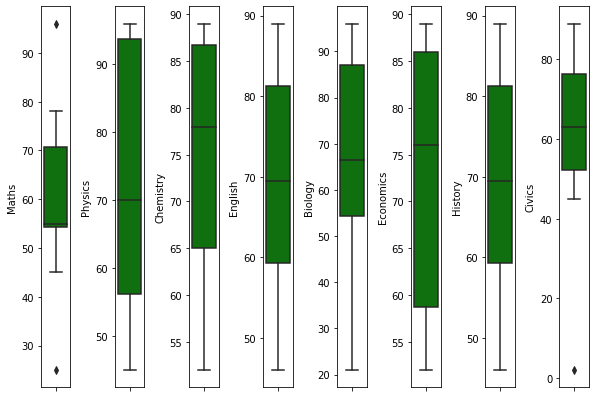

In [21]:
#plotting all the columns together
plt.figure(figsize=(col,5*col))
for i in range(3,len(col_list)):
    plt.subplot(rows,col,i+1)
    sns.boxplot(df[col_list[i]],color = "green",orient='v')
    plt.tight_layout()

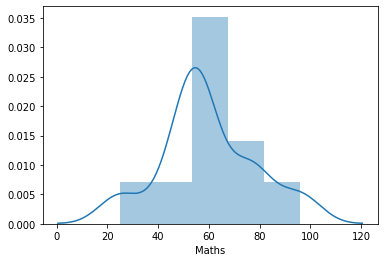

In [22]:
#skewness check

sns.distplot(df["Maths"])

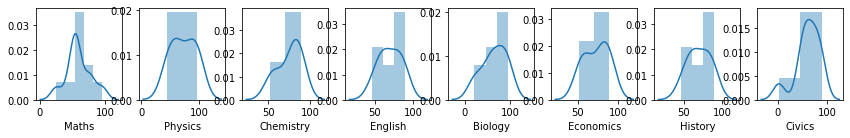

In [29]:
plt.figure(figsize = (20,20))
for i in range(3, len(col_list)):
    plt.subplot(rows, col,i)
    sns.distplot(df[col_list[i]])

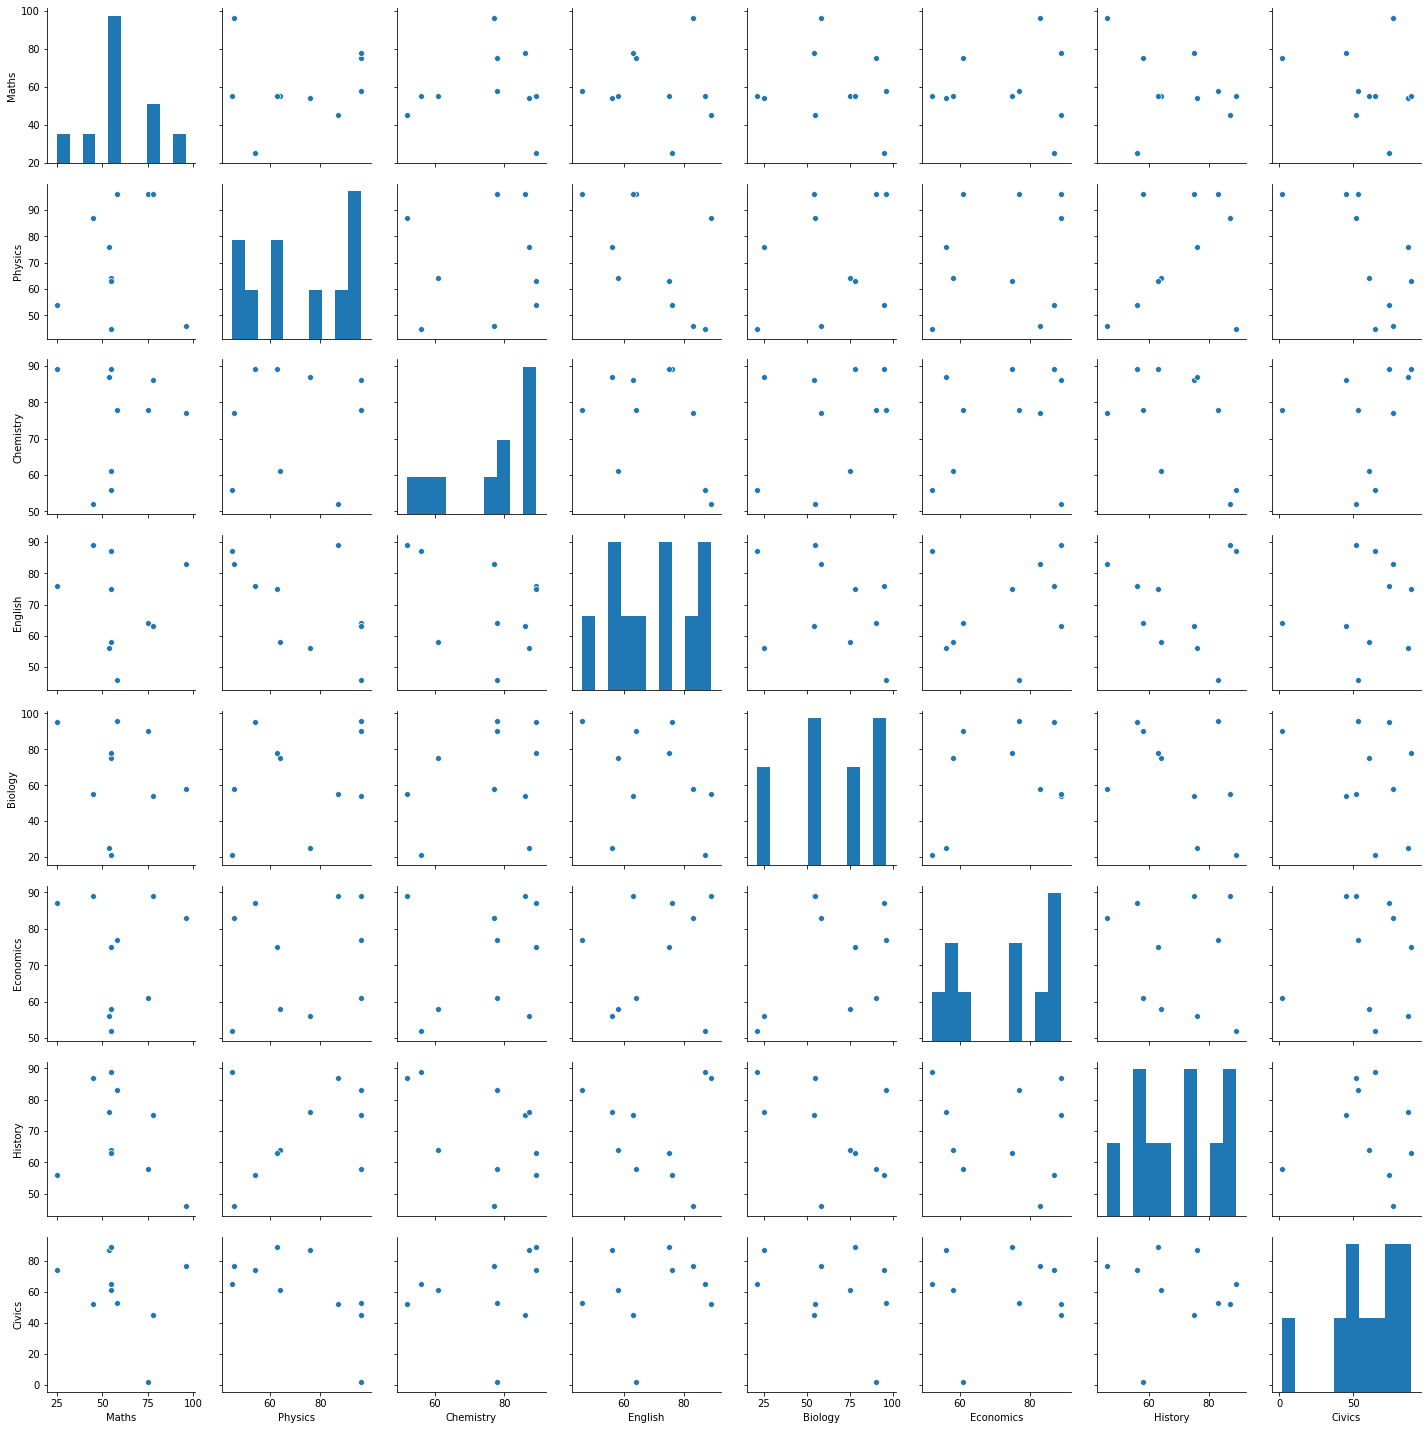

In [32]:
#bivariate analysis

sns.pairplot(df)
plt.show()